# KELOMPOK 9
1. Muhammad Ridwan
2. Devika Widya Vania
3. Nashwa Aqeel
4. Achmad Sabila Rusdi

## **SUMBER DATA = https://www.kaggle.com/datasets/xavierberge/hospital-emergency-dataset**

# **1. LOAD DATA**

In [33]:
# Import Packages
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df = pd.read_csv("Hospital ER_Data.csv")

# **2. Basic Information about the Dataset**

In [35]:
# baca kolom pada data
df.columns

Index(['Patient Id', 'Patient Admission Date', 'Patient First Inital',
       'Patient Last Name', 'Patient Gender', 'Patient Age', 'Patient Race',
       'Department Referral', 'Patient Admission Flag',
       'Patient Satisfaction Score', 'Patient Waittime', 'Patients CM'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient Id                  9216 non-null   object 
 1   Patient Admission Date      9216 non-null   object 
 2   Patient First Inital        9216 non-null   object 
 3   Patient Last Name           9216 non-null   object 
 4   Patient Gender              9216 non-null   object 
 5   Patient Age                 9216 non-null   int64  
 6   Patient Race                9216 non-null   object 
 7   Department Referral         3816 non-null   object 
 8   Patient Admission Flag      9216 non-null   bool   
 9   Patient Satisfaction Score  2517 non-null   float64
 10  Patient Waittime            9216 non-null   int64  
 11  Patients CM                 9216 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 801.1+ KB


In [37]:
df.head()

,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM
0,145-39-5406,20-03-2024 08:47,H,Glasspool,M,69,White,NaN,False,10.0,39,0
1,316-34-3057,15-06-2024 11:29,X,Methuen,M,4,Native American/Alaska Native,NaN,True,NaN,27,0
2,897-46-3852,20-06-2024 09:13,P,Schubuser,F,56,African American,General Practice,True,9.0,55,0
3,358-31-9711,04-02-2024 22:34,U,Titcombe,F,24,Native American/Alaska Native,General Practice,True,8.0,31,0
4,289-26-0537,04-09-2024 17:48,Y,Gionettitti,M,5,African American,Orthopedics,False,NaN,10,0


In [38]:
df.describe()

,Patient Age,Patient Satisfaction Score,Patient Waittime,Patients CM
count,9216.000000,2517.000000,9216.000000,9216.000000
mean,39.855143,4.992054,35.259874,0.052083
std,22.755125,3.138043,14.735323,0.222207
min,1.000000,0.000000,10.000000,0.000000
25%,20.000000,2.000000,23.000000,0.000000
50%,39.000000,5.000000,35.000000,0.000000
75%,60.000000,8.000000,48.000000,0.000000
max,79.000000,10.000000,60.000000,1.000000


# **3. Check Duplicate Values, Unique Values**

In [39]:
df.nunique()

,0
Patient Id,9216
Patient Admission Date,9176
Patient First Inital,26
Patient Last Name,8400
Patient Gender,3
Patient Age,79
Patient Race,7
Department Referral,7
Patient Admission Flag,2
Patient Satisfaction Score,11


In [40]:
df.duplicated().sum()

np.int64(0)

# ***4. Visualize the Number of Unique Values***

/tmp/ipython-input-1694458934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='viridis')


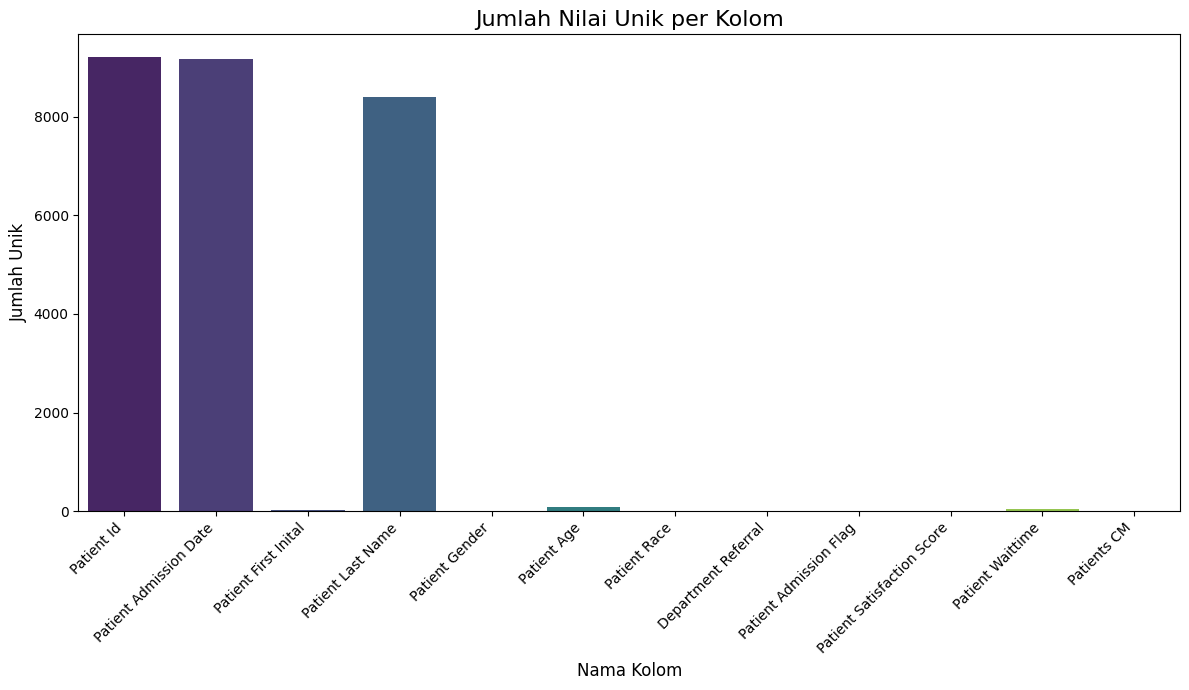

In [41]:
plt.figure(figsize=(12, 7))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='viridis')
plt.title('Jumlah Nilai Unik per Kolom', fontsize=16)
plt.xlabel('Nama Kolom', fontsize=12)
plt.ylabel('Jumlah Unik', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **5. Finding Null Values**

In [42]:
df.isnull().sum()

,0
Patient Id,0
Patient Admission Date,0
Patient First Inital,0
Patient Last Name,0
Patient Gender,0
Patient Age,0
Patient Race,0
Department Referral,5400
Patient Admission Flag,0
Patient Satisfaction Score,6699


# **6. Replace All Null Values**

In [43]:
# Hitung median HANYA dari data yang sudah bersih
median_score = df['Patient Satisfaction Score'].median()
# Isi nilai NaN dengan median
df['Patient Satisfaction Score'].fillna(median_score, inplace=True)

/tmp/ipython-input-604706091.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Patient Satisfaction Score'].fillna(median_score, inplace=True)


In [44]:
# ubah None pada kolom Departement Referral menjdi 'tidak ada rujukan'
df['Department Referral'].fillna('Tidak Ada Rujukan', inplace=True)

/tmp/ipython-input-3616472538.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Department Referral'].fillna('Tidak Ada Rujukan', inplace=True)


In [45]:
df.head()

,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM
0,145-39-5406,20-03-2024 08:47,H,Glasspool,M,69,White,Tidak Ada Rujukan,False,10.0,39,0
1,316-34-3057,15-06-2024 11:29,X,Methuen,M,4,Native American/Alaska Native,Tidak Ada Rujukan,True,5.0,27,0
2,897-46-3852,20-06-2024 09:13,P,Schubuser,F,56,African American,General Practice,True,9.0,55,0
3,358-31-9711,04-02-2024 22:34,U,Titcombe,F,24,Native American/Alaska Native,General Practice,True,8.0,31,0
4,289-26-0537,04-09-2024 17:48,Y,Gionettitti,M,5,African American,Orthopedics,False,5.0,10,0


# **7. Knowing the Types of Datasets**

In [48]:
df.dtypes

,0
Patient Id,object
Patient Admission Date,object
Patient First Inital,object
Patient Last Name,object
Patient Gender,object
Patient Age,int64
Patient Race,object
Department Referral,object
Patient Admission Flag,bool
Patient Satisfaction Score,float64


In [49]:
# ubah tipe data ke datetime untuk kolom Patient Admision Date
df['Patient Admission Date'] = pd.to_datetime(df['Patient Admission Date'], format='%d-%m-%Y %H:%M')

In [50]:
df.dtypes

,0
Patient Id,object
Patient Admission Date,datetime64[ns]
Patient First Inital,object
Patient Last Name,object
Patient Gender,object
Patient Age,int64
Patient Race,object
Department Referral,object
Patient Admission Flag,bool
Patient Satisfaction Score,float64


# **8. Data Filter**

In [57]:
# pasien yang berusia di atas 60 tahun dan membutuhkan Fisioterapi
filtered_data = df[(df['Patient Age'] > 60) & (df['Department Referral'] == 'Physiotherapy')]
print(f"Ditemukan {len(filtered_data)} pasien berusia di atas 60 tahun dengan rujukan Fisioterapi.")
print("Contoh data yang telah difilter:")
print(filtered_data.head())

Ditemukan 71 pasien berusia di atas 60 tahun dengan rujukan Fisioterapi.
Contoh data yang telah difilter:
      Patient Id Patient Admission Date Patient First Inital  \
18   728-31-2493    2023-09-04 16:15:00                    W   
33   278-49-6531    2024-08-05 01:33:00                    L   
397  271-74-6084    2024-04-15 01:32:00                    W   
549  722-84-3095    2023-05-21 20:20:00                    F   
605  178-03-0288    2023-09-13 05:11:00                    F   

    Patient Last Name Patient Gender  Patient Age       Patient Race  \
18           Chittock              F           70              Asian   
33           Vannacci              F           74              White   
397           Wycliff              F           62   African American   
549             Plank              F           76  Two or More Races   
605              Kunz              F           73  Two or More Races   

    Department Referral  Patient Admission Flag  Patient Satisfaction Score 

In [53]:
# Departemen yang memiliki nilai rata-rata tingkat kepuasan lebih dari 5 dan kurang dari 5

kepuasan = df.groupby("Department Referral")["Patient Satisfaction Score"].mean().reset_index()
diatas_5 = kepuasan[kepuasan["Patient Satisfaction Score"]>5]
dibawah_5 = kepuasan[kepuasan["Patient Satisfaction Score"]<5]

print("Departemen yang memiliki nilai rata-rata tingkat kepuasan lebih dari 5 : ")
print(diatas_5,"\n")
print("Departemen yang memiliki nilai rata-rata tingkat kepuasan kurang dari 5 : ")
print(dibawah_5)

Departemen yang memiliki nilai rata-rata tingkat kepuasan lebih dari 5 : 
  Department Referral  Patient Satisfaction Score
0          Cardiology                    5.040323
1    Gastroenterology                    5.241573
2    General Practice                    5.016848
3           Neurology                    5.077720 

Departemen yang memiliki nilai rata-rata tingkat kepuasan kurang dari 5 : 
  Department Referral  Patient Satisfaction Score
4         Orthopedics                    4.958794
5       Physiotherapy                    4.996377
6               Renal                    4.883721
7   Tidak Ada Rujukan                    4.987593


In [54]:
# Distribusi pasien berdasarkan kategori usia
bins = [0, 12, 17, 39, 59, 120]
labels = ["Anak-anak :", "Remaja :", "Dewasa Muda :", "Dewasa :", "Lansia :"]

df["Kategori Usia"] = pd.cut(df["Patient Age"], bins=bins, labels=labels, right=True)
distribusi = df["Kategori Usia"].value_counts().sort_index()

print("\nDistribusi pasien berdasarkan kategori usia:\n")
print(distribusi)


Distribusi pasien berdasarkan kategori usia:

Kategori Usia
Anak-anak :      1413
Remaja :          558
Dewasa Muda :    2652
Dewasa :         2286
Lansia :         2307
Name: count, dtype: int64


In [55]:
# Pasien dengan skor kepuasan tinggi (di atas 8) dan waktu tunggu singkat (kurang dari 20 menit)
print("\n")
filtered_data_2 = df[(df['Patient Satisfaction Score'] > 8) & (df['Patient Waittime'] < 20)]
print(f"Ditemukan {len(filtered_data_2)} pasien dengan skor kepuasan > 8 dan waktu tunggu < 20 menit.")
print("Contoh data yang telah difilter (Filter 2):")
print(filtered_data_2.head())



Ditemukan 98 pasien dengan skor kepuasan > 8 dan waktu tunggu < 20 menit.
Contoh data yang telah difilter (Filter 2):
       Patient Id Patient Admission Date Patient First Inital  \
86    496-23-9655    2023-10-11 03:24:00                    X   
256   353-11-2559    2023-12-02 20:38:00                    V   
809   574-06-1810    2023-06-04 02:36:00                    R   
1102  703-90-9423    2023-06-23 09:01:00                    E   
1317  381-92-2973    2023-06-06 17:51:00                    U   

     Patient Last Name Patient Gender  Patient Age          Patient Race  \
86              Maffin              F           15  Declined to Identify   
256         Pollington              F           49                 Asian   
809             Curner              M           70                 White   
1102          Killiner              F           45      African American   
1317           Chitham              F           79      African American   

     Department Referral  Patien

In [56]:
# Menyaring pasien ras 'African American' dan berjenis kelamin perempuan ('F')
print("\n")
filtered_data_3 = df[(df['Patient Race'] == 'African American') & (df['Patient Gender'] == 'F')]
print(f"Ditemukan {len(filtered_data_3)} pasien ras 'African American' berjenis kelamin perempuan.")
print("Contoh data yang telah difilter (Filter 3):")
print(filtered_data_3.head())



Ditemukan 917 pasien ras 'African American' berjenis kelamin perempuan.
Contoh data yang telah difilter (Filter 3):
     Patient Id Patient Admission Date Patient First Inital Patient Last Name  \
2   897-46-3852    2024-06-20 09:13:00                    P         Schubuser   
26  598-53-3927    2024-09-04 02:30:00                    S             Noads   
29  693-38-2084    2024-07-07 14:58:00                    H             Kehoe   
39  878-55-0051    2023-07-06 19:47:00                    R        Harrington   
42  553-27-8559    2023-05-27 06:13:00                    Q       Garnsworthy   

   Patient Gender  Patient Age      Patient Race Department Referral  \
2               F           56  African American    General Practice   
26              F           68  African American   Tidak Ada Rujukan   
29              F           72  African American   Tidak Ada Rujukan   
39              F           22  African American    General Practice   
42              F            8  Afr

# **9. Create a Box Plot**

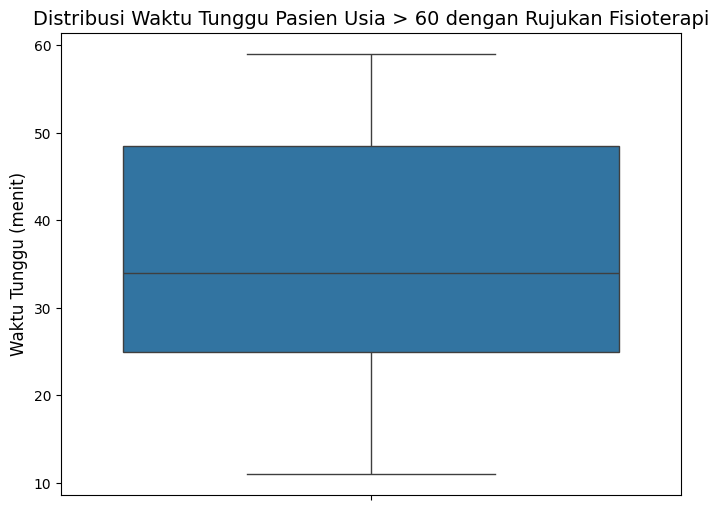

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_data['Patient Waittime'])
plt.title('Distribusi Waktu Tunggu Pasien Usia > 60 dengan Rujukan Fisioterapi', fontsize=14)
plt.ylabel('Waktu Tunggu (menit)', fontsize=12)
plt.show()

/tmp/ipython-input-1169141475.py:3: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[diatas_5['Patient Satisfaction Score'], dibawah_5['Patient Satisfaction Score']],


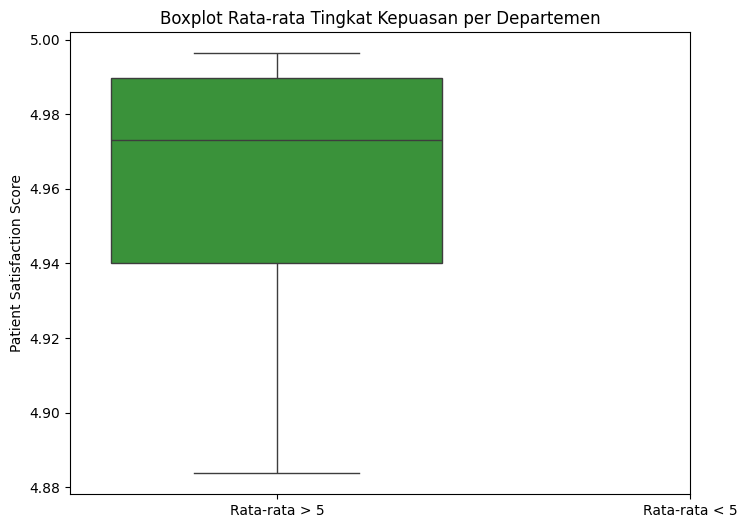

In [63]:
# Boxplot nilai rata-rata tingkat kepuasan per departemen (diatas_5 dan dibawah_5)
plt.figure(figsize=(8, 6))
sns.boxplot(data=[diatas_5['Patient Satisfaction Score'], dibawah_5['Patient Satisfaction Score']],
            palette=['#2ca02c', '#d62728'])
plt.xticks([0, 1], ['Rata-rata > 5', 'Rata-rata < 5'])
plt.title('Boxplot Rata-rata Tingkat Kepuasan per Departemen')
plt.ylabel('Patient Satisfaction Score')
plt.show()

/tmp/ipython-input-1385870274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Kategori Usia', y='Patient Waittime', data=df, palette='pastel')


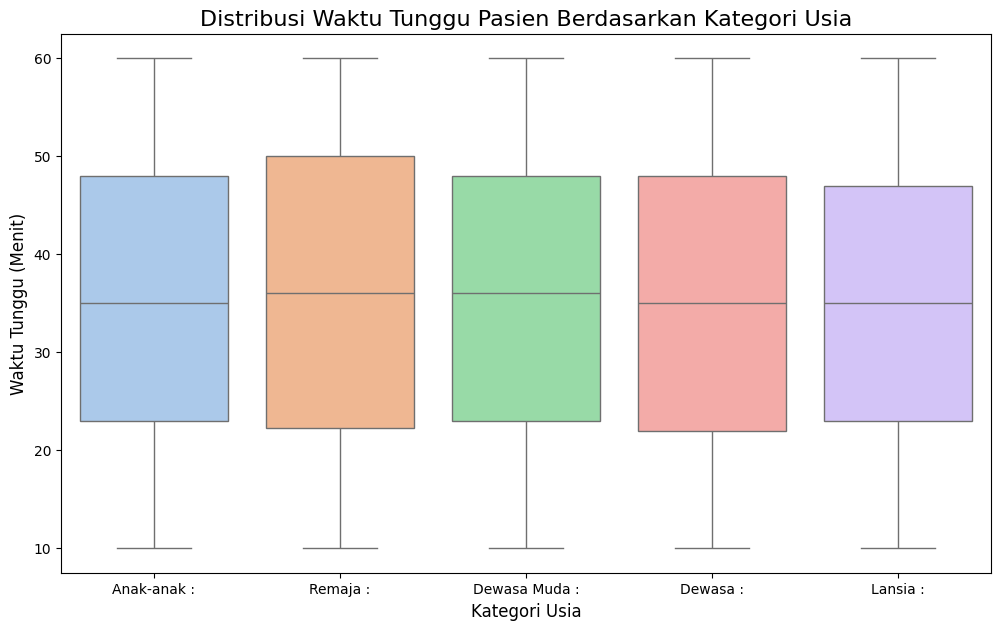

In [65]:
# Box plot waktu tunggu berdasarkan kategori usia
plt.figure(figsize=(12, 7))
sns.boxplot(x='Kategori Usia', y='Patient Waittime', data=df, palette='pastel')
plt.title('Distribusi Waktu Tunggu Pasien Berdasarkan Kategori Usia', fontsize=16)
plt.xlabel('Kategori Usia', fontsize=12)
plt.ylabel('Waktu Tunggu (Menit)', fontsize=12)
plt.show()

/tmp/ipython-input-3351012216.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grup Kepuasan', y='Patient Age', data=df, palette='Set2')


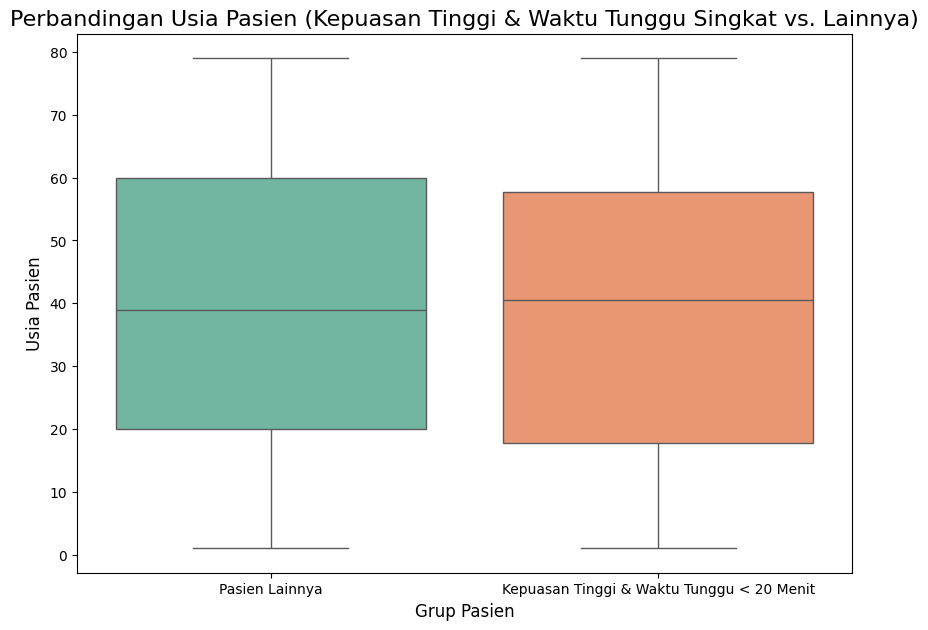

In [67]:
# Box plot kepuasan dan waktu tunggu (tinggi) & lainnya
df['Grup Kepuasan'] = (df['Patient Satisfaction Score'] > 8) & (df['Patient Waittime'] < 20)

plt.figure(figsize=(10, 7))
sns.boxplot(x='Grup Kepuasan', y='Patient Age', data=df, palette='Set2')
plt.title('Perbandingan Usia Pasien (Kepuasan Tinggi & Waktu Tunggu Singkat vs. Lainnya)', fontsize=16)
plt.xlabel('Grup Pasien', fontsize=12)
plt.ylabel('Usia Pasien', fontsize=12)
plt.xticks(ticks=[False, True], labels=['Pasien Lainnya', 'Kepuasan Tinggi & Waktu Tunggu < 20 Menit'])
plt.show()

/tmp/ipython-input-2416299021.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=filtered_data_3, x='Patient Age', kde=True, bins=20, palette='viridis')


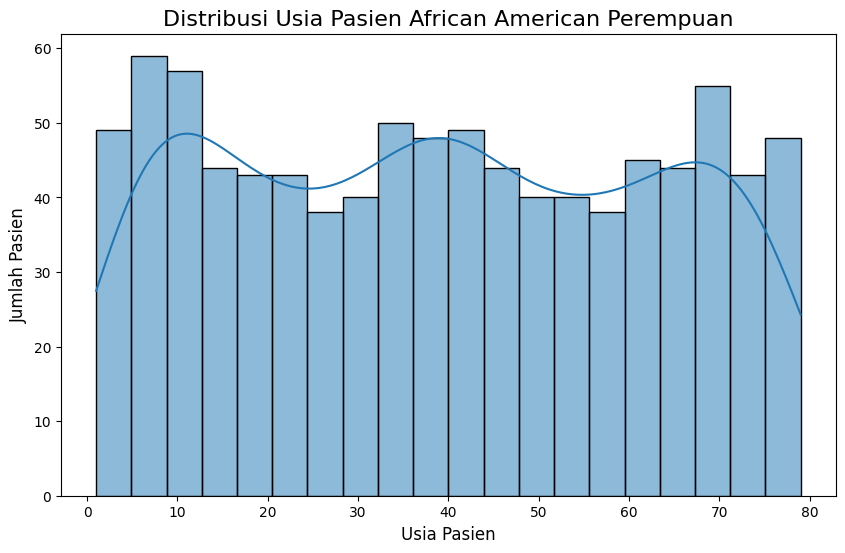

In [69]:
# Distribusi usia pasien ras African American perempuan
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data_3, x='Patient Age', kde=True, bins=20, palette='viridis')
plt.title('Distribusi Usia Pasien African American Perempuan', fontsize=16)
plt.xlabel('Usia Pasien', fontsize=12)
plt.ylabel('Jumlah Pasien', fontsize=12)
plt.show()

# **10. Correlation**


--- 12. Heatmap Korelasi Antar Kolom Numerik ---


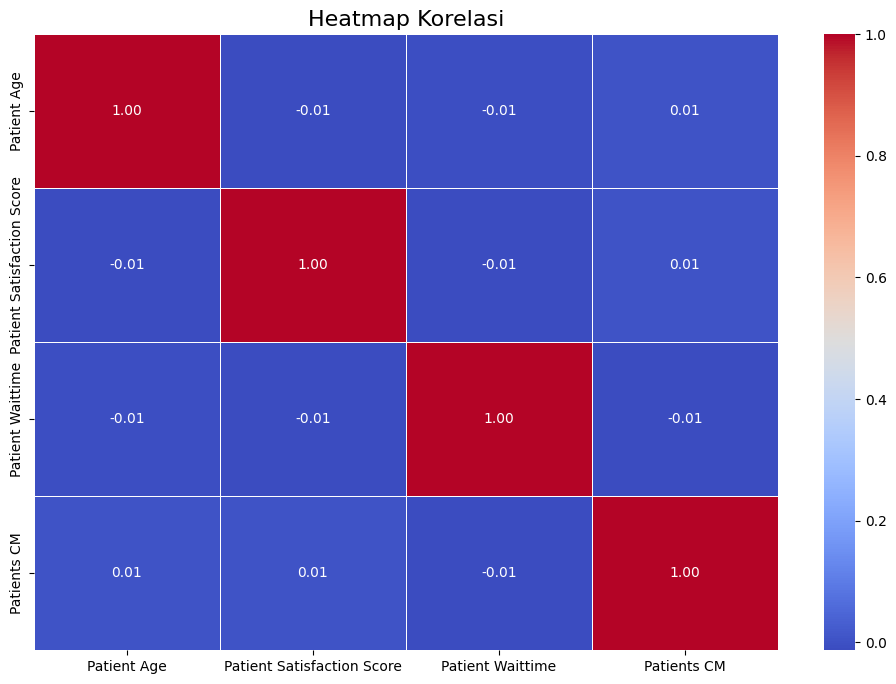

In [72]:
print("\n--- 12. Heatmap Korelasi Antar Kolom Numerik ---")
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi', fontsize=16)
plt.show()

Korelasi antara waktu tunggu dan kepuasan pasien: -0.01


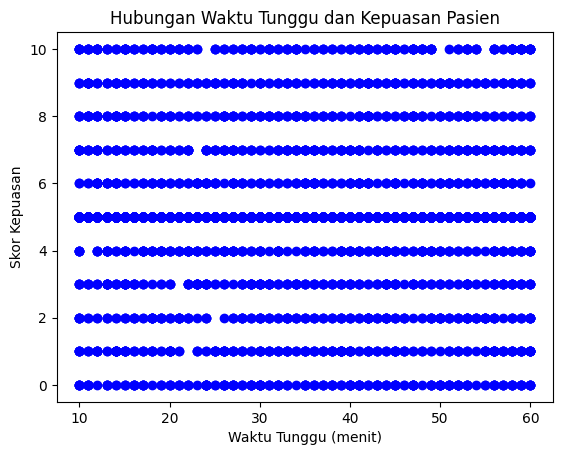

In [74]:
corr = df["Patient Waittime"].corr(df["Patient Satisfaction Score"])
print("Korelasi antara waktu tunggu dan kepuasan pasien:", round(corr, 2))

# grafik
plt.scatter(df["Patient Waittime"], df["Patient Satisfaction Score"], color="blue")
plt.title("Hubungan Waktu Tunggu dan Kepuasan Pasien")
plt.xlabel("Waktu Tunggu (menit)")
plt.ylabel("Skor Kepuasan")
plt.show()